In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
import os
os.getcwd()

'E:\\Complete Machine Learning'

In [3]:
os.chdir('E:\\Complete Machine Learning\\Car price')

In [4]:
train=pd.read_csv('train.csv')

In [5]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
train.shape

(19237, 18)

In [8]:
train.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [10]:
numerical_feature=[feature for feature in train.columns if train[feature].dtypes!='O']
numerical_feature

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [12]:
categorical_feature=[feature for feature in train.columns if train[feature].dtypes=='O']
print(categorical_feature)

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [14]:
discrete_feature=[feature for feature in numerical_feature if train[feature].nunique()<25]
discrete_feature

['Cylinders', 'Airbags']

In [16]:
categorical_discrete_feature=[feature for feature in categorical_feature if train[feature].nunique()<15]
print(categorical_discrete_feature)

['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']


In [17]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['ID', 'Price', 'Prod. year']

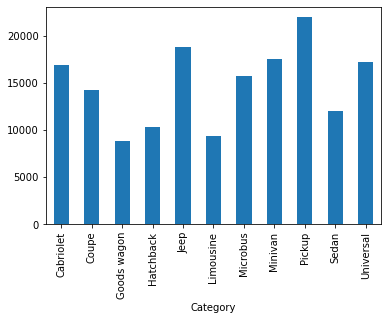

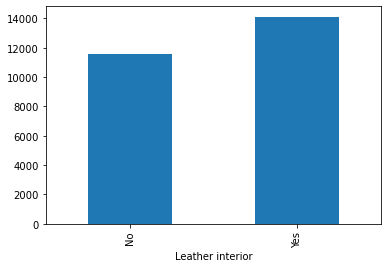

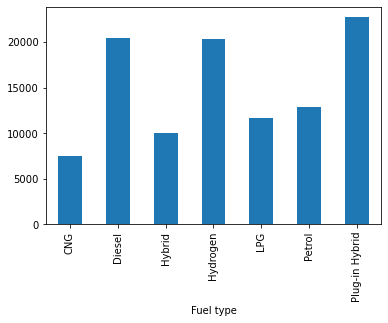

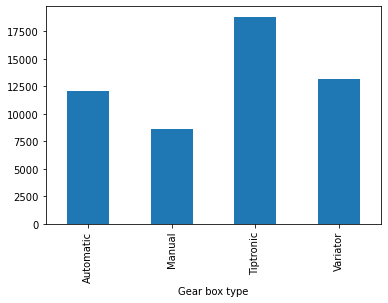

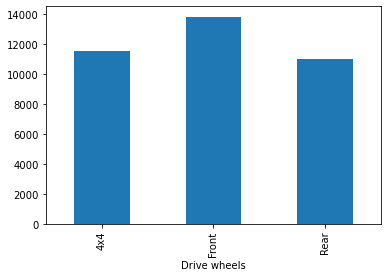

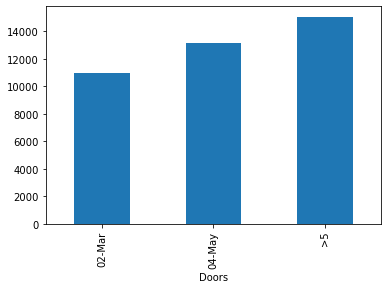

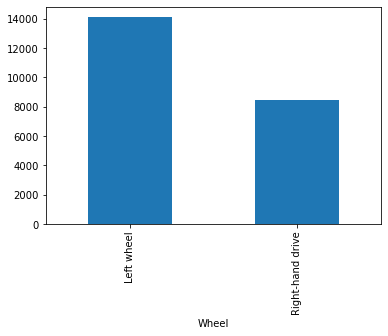

In [18]:
for feature in categorical_discrete_feature:
    train.groupby(feature)['Price'].median().plot.bar()
    plt.show()

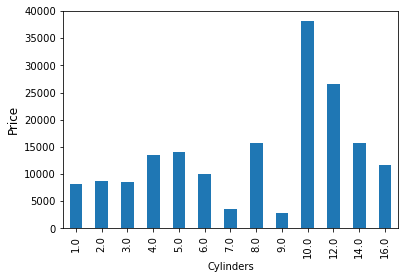

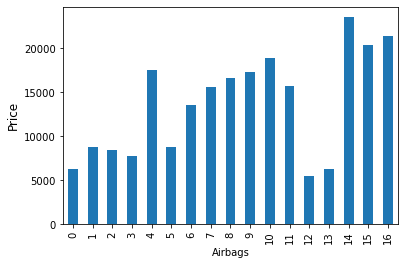

In [19]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)["Price"].median().plot.bar()
    plt.ylabel('Price',fontsize=12)
    plt.show()

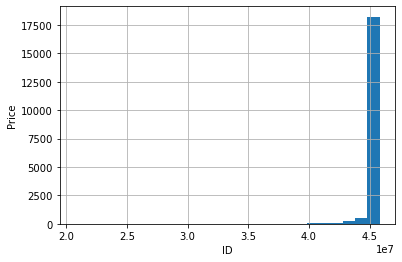

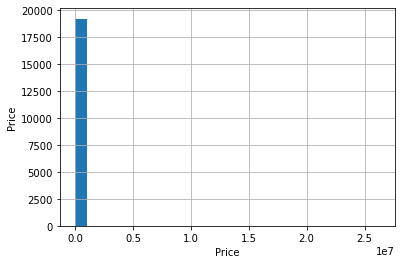

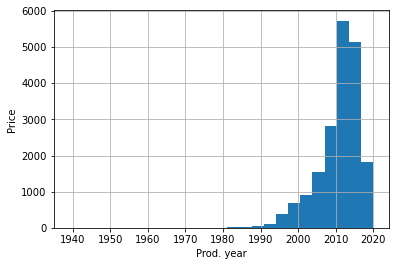

In [20]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

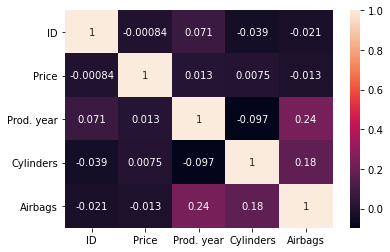

In [21]:
train_corr=train.corr()
sns.heatmap(train_corr,annot=True)

In [22]:
train['Levy']=pd.to_numeric(train["Levy"],errors='coerce')
train['Levy']=train['Levy'].fillna(train['Levy'].mean())
train['Levy']=np.round(train['Levy'],2)

In [23]:
test=pd.read_csv('test.csv')

In [24]:
test['Levy']=pd.to_numeric(test['Levy'],errors='coerce')
test['Levy']=test['Levy'].fillna(test['Levy'].mean())
test['Levy']=np.round(test['Levy'],2)

In [25]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,917.86,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,917.86,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,917.86,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975.00,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,917.86,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [26]:
ls=train['Engine volume'].str.contains('Turbo')
ls[ls==1].index
train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)

train['Engine volume']=train['Engine volume'].astype(float)

<ipython-input-26-cc9a9d8144ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Engine volume'][ls]=train['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [27]:
ls=test['Engine volume'].str.contains('Turbo')
ls=ls[ls==1].index
test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)
test['Engine volume']=test['Engine volume'].astype(float)


<ipython-input-27-fb5da5841581>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Engine volume'][ls]=test['Engine volume'][ls].str.replace('Turbo','',regex=True)


In [28]:
train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.00,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906.84,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.00,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.00,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [30]:
test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,917.86,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,917.86,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,917.86,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975.00,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,917.86,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [33]:
train['Mileage']=train['Mileage'].str.replace('km','',regex=True)
train['Mileage']=train['Mileage'].astype(int)

In [32]:
test['Mileage']=test['Mileage'].str.replace('km','',regex=True)
test['Mileage']=test['Mileage'].astype(int)

<AxesSubplot:>

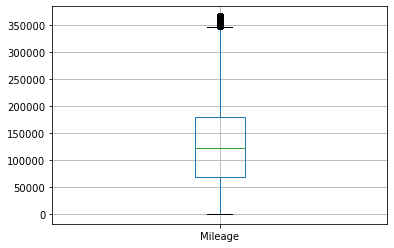

In [34]:
Q1=train['Mileage'].quantile(0.25)
Q3=train['Mileage'].quantile(0.75)
IQR=Q3-Q1

train=train.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
train.boxplot('Mileage')



<AxesSubplot:>

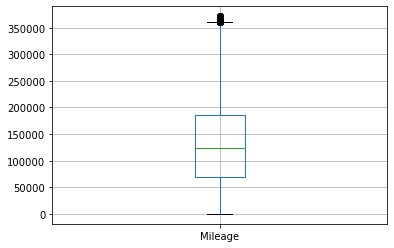

In [35]:
Q1=test['Mileage'].quantile(0.25)
Q3=test['Mileage'].quantile(0.75)
IQR=Q3-Q1

test=test.query('(@Q1-1.5*@IQR)<=Mileage<=(@Q3+1.5*@IQR)')
test.boxplot('Mileage')

In [36]:
def one_hot(data,variable):
    list_10=list(data[variable].value_counts().head(10).index)
    for category in list_10:
        data[category]=np.where(data[variable]==category,1,0)

In [37]:
train['source']='train'
test['source']='test'

In [38]:
data=pd.concat([train,test],axis=0)

In [44]:
data.shape

(26591, 70)

In [40]:
one_hot(data,'Manufacturer')

In [41]:
one_hot(data,'Model')

In [43]:
data=pd.get_dummies(data,columns=['Category','Fuel type','Gear box type','Drive wheels','Leather interior','Wheel','Color'],
                    drop_first=True)

In [45]:

data['Doors']=data['Doors'].str.replace('-May','')
data['Doors']=data['Doors'].str.replace('-Mar','')
data['Doors']=data['Doors'].str.replace('>','')
data['Doors']=data['Doors'].astype(int)

In [48]:
data.head(5)

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,source,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Elantra,Camry,Sonata,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1399.00,2010,3.5,186005,6.0,4,12,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,1018.00,2011,3.0,192000,6.0,4,8,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,906.84,2006,1.3,200000,4.0,4,2,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862.00,2011,2.5,168966,4.0,4,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,446.00,2014,1.3,91901,4.0,4,4,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
data.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [49]:
train=data[data['source']=='train']

In [50]:
test=data[data['source']=='test']

In [51]:
X=train.loc[:,train.columns!='Price']
y=train['Price']
X.drop(['ID'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
X.head(5)

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,Prius,Elantra,Camry,Sonata,E 350,Santa FE,H1,FIT,Tucson,X5,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Leather interior_Yes,Wheel_Right-hand drive,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399.00,2010,3.5,186005,6.0,4,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1018.00,2011,3.0,192000,6.0,4,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,906.84,2006,1.3,200000,4.0,4,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,862.00,2011,2.5,168966,4.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,446.00,2014,1.3,91901,4.0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
X.drop(['source'],axis=1,inplace=True)

C:\Users\Manan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
scaler.fit(X)

StandardScaler()

In [57]:
X=pd.DataFrame(scaler.transform(X),columns=X.columns)

In [58]:
X.shape,y.shape

((18597, 65), (18597,))

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [60]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=0)
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)

In [63]:
print(mae(y_val,y_pred))

11457.23851739344


In [64]:
model.score(X_val,y_val)

0.0006020068773852083